In [1]:
#!/usr/bin/python3.10

Prerequisites: pandas, xlrd, matplotlib, rpy2

# HSMC modelling

## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

**Import OpenAlea packages**

In [2]:
from openalea.stat_tool import _stat_tool
from openalea.sequence_analysis import _sequence_analysis
from openalea.sequence_analysis.hidden_semi_markov import HiddenSemiMarkov
from openalea.sequence_analysis.simulate import Simulate
from openalea.sequence_analysis.data_transform import Thresholding

from openalea.stat_tool.data_transform import *
from openalea.stat_tool.cluster import Cluster
from openalea.stat_tool.cluster import Transcode, Cluster

import openalea.stat_tool.plot #import DISABLE_PLOT
# openalea.stat_tool.plot.DISABLE_PLOT = True
from openalea.stat_tool.plot import DISABLE_PLOT
DISABLE_PLOT = False

import os

from openalea.stat_tool.output import plot, Plot

plot.DISABLE_PLOT = DISABLE_PLOT

from openalea.stat_tool.plot import get_plotter, mplotlib 

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'2.0.1'

##### Enabling R extensions

In [5]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [6]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Determining if images have to be saved (not used for the moment)

## Loading and preparing data

In [7]:
import sys, os

In [8]:
sys.path

['/home/jdurand/devlp/Git/openalea/StructureAnalysis',
 '/home/jdurand/miniforge3/envs/openalea/lib/python310.zip',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/src',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/stat_tool/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [9]:
sys.path.append(".." + os.sep + "tutorials")

In [10]:
# TODO: fix this
# get_shared_data("data")

In [11]:
from pathlib import Path
data_path = Path(openalea.sequence_analysis.__path__[0])
data_path = str(Path.joinpath(data_path.parent.parent.parent.absolute(), "share","data"))


**Read an existing HSMC model**

In [12]:
model_file = "test_hidden_semi_markov_param.dat"

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

In [25]:
print(hsm.display())

HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
0.4  0.3  0.3  

TRANSITION_PROBABILITIES
0    0.8  0.2  
0.2  0    0.8  
0.8  0.2  0    

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 13.1945   median: 11   mode: 0
variance: 221.222   standard deviation: 14.8735   lower quartile: 0   upper quartile: 21

time up to the first occurrence of state 1 distribution
mean: 7.9683   median: 1   mode: 1
variance: 125.497   standard deviation: 11.2025   lower quartile: 0   upper quartile: 15

time up to the first occurrence of state 2 distribution
mean: 5.70639   median: 5   mode: 0
variance: 35.6158   standard deviation: 5.9679   lower quartile: 0   upper quartile: 9

state 0 recurrence time distribution
mean: 22.8494   median: 21   mode: 1
variance: 215.918   standard deviation: 14.6942   lower quartile: 13   upper quartile: 29

state 1 recurrence time distribution
mean: 3.43515   median: 1   mode: 1
variance: 54.7054   standard deviation

**Simulate sequences**

In [13]:
from openalea.sequence_analysis import Simulate

In [24]:
from openalea.stat_tool.distribution import set_seed
set_seed(0)

Simulate *nb_seq* sequences with length *seq_length*

In [14]:
nb_seq = 30
seq_length = 100
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)


N.o. initial states in parallel: 0

ERROR: 27 4.57723 4.52005


In [15]:
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)


N.o. initial states in parallel: 0


In [16]:
# Print first simulated sequence.
# First variable is the simulated state
print(seq[0])

[[2, 20], [2, 7], [2, 18], [2, 9], [2, 9], [2, 13], [2, 14], [2, 16], [0, 2], [1, 13], [1, 5], [1, 10], [1, 5], [1, 8], [1, 5], [1, 4], [1, 7], [1, 11], [1, 14], [1, 5], [1, 8], [1, 10], [1, 4], [1, 7], [2, 6], [2, 17], [2, 17], [2, 31], [2, 18], [2, 16], [2, 11], [2, 12], [2, 21], [2, 9], [2, 6], [2, 17], [2, 18], [2, 21], [2, 16], [2, 21], [2, 21], [2, 14], [2, 9], [2, 20], [2, 27], [2, 22], [0, 1], [1, 10], [1, 9], [1, 8], [1, 3], [1, 4], [1, 10], [1, 7], [2, 14], [2, 17], [2, 17], [2, 19], [2, 19], [2, 17], [2, 11], [2, 16], [2, 9], [2, 17], [2, 29], [0, 1], [1, 18], [1, 10], [2, 12], [2, 22], [2, 29], [2, 17], [2, 16], [2, 15], [2, 18], [2, 18], [2, 16], [2, 20], [2, 14], [2, 21], [2, 17], [2, 13], [2, 11], [2, 15], [2, 15], [2, 13], [2, 17], [2, 5], [2, 13], [0, 1], [1, 4], [1, 10], [1, 4], [1, 7], [1, 4], [1, 7], [1, 6], [1, 4], [1, 7], [2, 22]]


Discard variable 1 (state)

In [17]:
obs = seq.select_variable([1], keep=False)

## Plotting marginal probabilities of data

In [18]:
# Variable 1
# obs.plot("Intensity", 1)

## HSCM re-estimation

### Reestimate from default initialisation

In [19]:
from openalea.sequence_analysis import Estimate

nb_states = 3
seq_estim = seq.select_variable([2], True)

# TODO: why are two states the same?
# TODO: set seed
hsmc_est = Estimate(seq_estim, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300)   
print(hsmc_est.display())

0
HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
0.333333  0.333333  0.333333  

TRANSITION_PROBABILITIES
0         0.5       0.5       
0.5       0         0.5       
0.5       0.5       0         

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 53.8083   median: 16   mode: 0
variance: 7342.75   standard deviation: 85.6899   lower quartile: 0   upper quartile: 71

time up to the first occurrence of state 0 frequency distribution - sample size: 14
mean: 25.2857   median: 12.5   mode: 0
variance: 889.758   standard deviation: 29.8288   lower quartile: 6   upper quartile: 34

time up to the first occurrence of state 1 distribution
mean: 45.3894   median: 9   mode: 0
variance: 6217.42   standard deviation: 78.8506   lower quartile: 0   upper quartile: 56

time up to the first occurrence of state 1 frequency distribution - sample size: 20
mean: 26.5   median: 5   mode: 0
variance: 1019.74   standard deviation: 31.9333   lower quartil

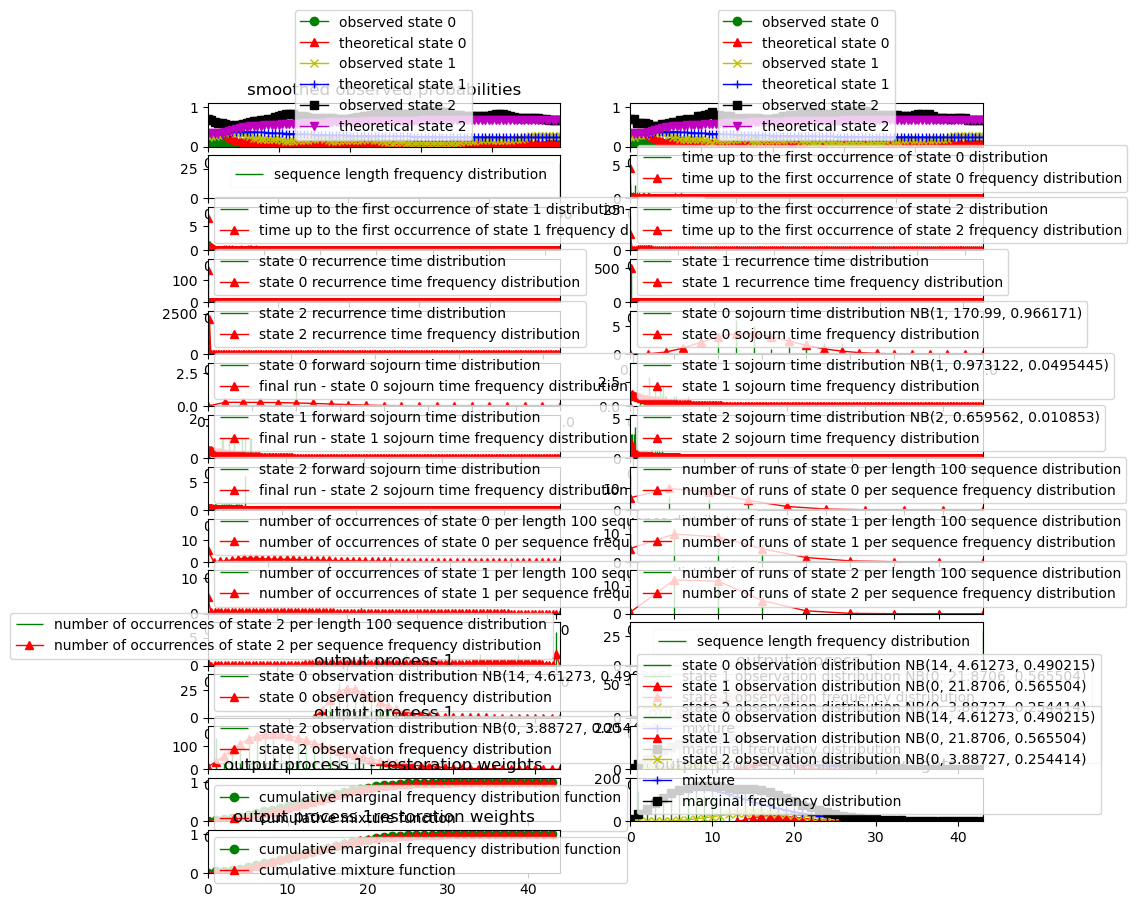

In [20]:
hsmc_est.plot()

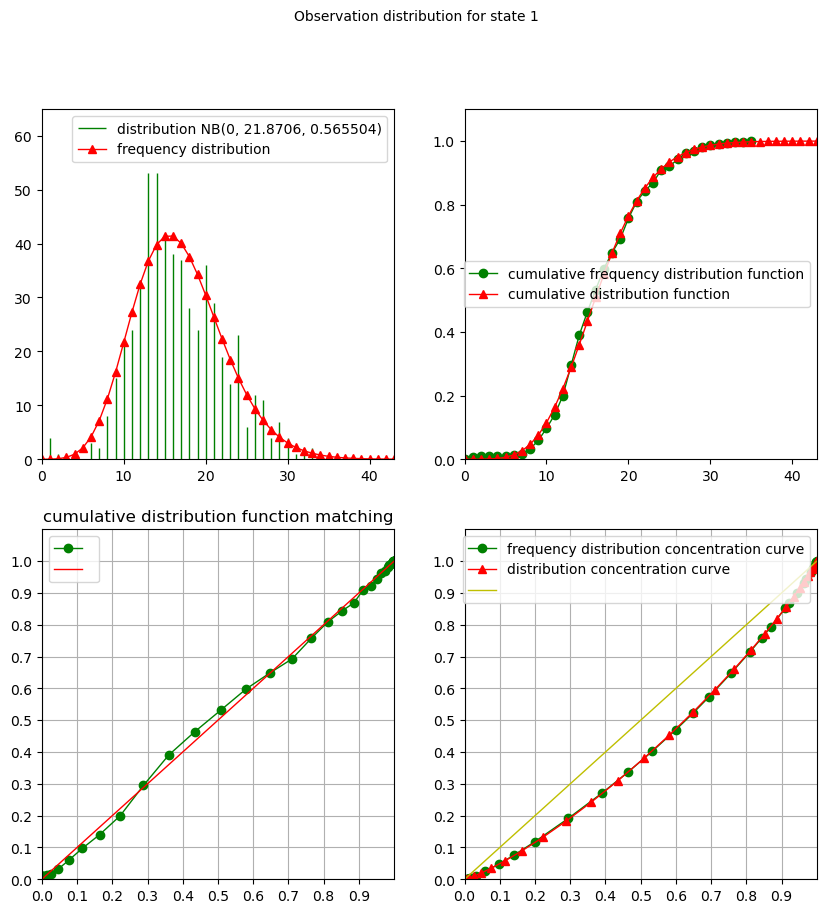

In [21]:
from openalea.sequence_analysis import seq_map
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

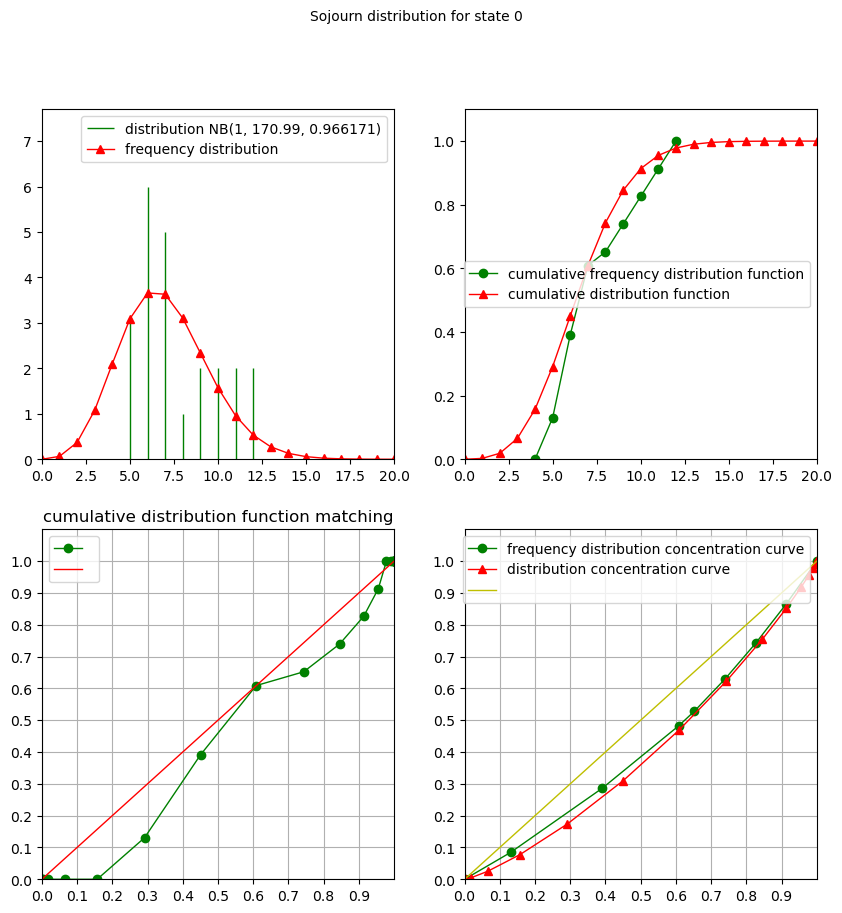

In [22]:
hsmc_est.extract(seq_map['Sojourn'],0,0).plot(Title="Sojourn distribution for state 0")

### Reestimate from file for initialisation

In [26]:
hsmc_est_file = Estimate(seq_estim, "HIDDEN_SEMI-MARKOV", hsm, Nbiteration=300)   
print(hsmc_est_file.display())

0
iteration 1   log-likelihood for the observed sequences: -9178.97
iteration 2   log-likelihood for the observed sequences: -1e+37

 Convergence failed, returning saved model with highest likelihood

2 iterations

complete/censored state occupancy weights
state 0: 0, 0
state 1: 0, 0
state 2: 0, 0

N.o. initial states in parallel: 0

log-likelihood for the state sequences: -9313.42 | -1e+37

posterior state sequence probability
sequence 1: 0.117037
sequence 2: 0.688736
sequence 3: 0.134467
sequence 4: 0.0342915
sequence 5: 0.18746
sequence 6: 0.139669
sequence 7: 0.119182
sequence 8: 0.0388294
sequence 9: 0.0928301
sequence 10: 0.0651236
sequence 11: 0.0511314
sequence 12: 0.0302966
sequence 13: 0.0310956
sequence 14: 0.0785945
sequence 15: 0.0644671
sequence 16: 0.0898138
sequence 17: 0.46997
sequence 18: 0.0338055
sequence 19: 0.0195885
sequence 20: 0.115756
sequence 21: 0.031508
sequence 22: 0.0559635
sequence 23: 0.0721868
sequence 24: 0.0450785
sequence 25: 0.0552158
sequence 26: 

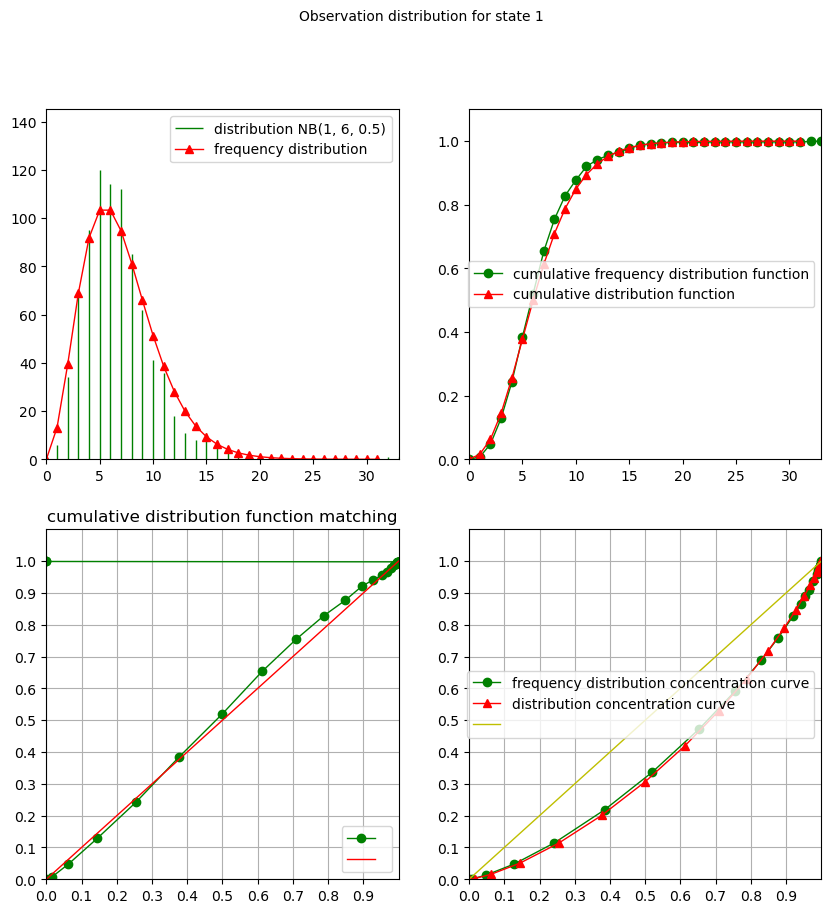

In [27]:
from openalea.sequence_analysis import seq_map
hsmc_est_file.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

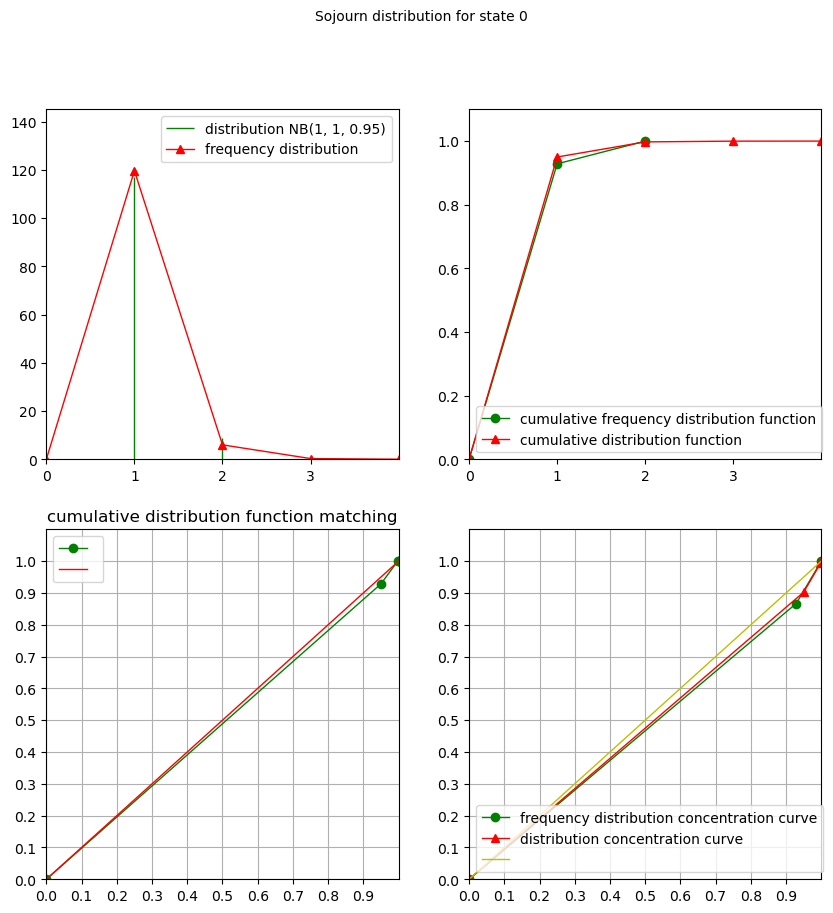

In [28]:
hsmc_est_file.extract(seq_map['Sojourn'],0,0).plot(Title="Sojourn distribution for state 0")